In [1]:
# Model imports
from transformers import pipeline as pip

# Data handling imports
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
data = pd.read_csv('../data/clean/sustainability-report-2020-NLB-reviewed.csv', sep=';', encoding='utf-8')

In [3]:
# Drop rows that have nan values in any column except LABEL
data = data.dropna(subset=['answer'], how='any')
data = data.dropna(subset=['context'], how='any')
data = data.dropna(subset=['question'], how='any')

In [4]:
# Load a model
qa = pip('question-answering', device=0)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
# Sanity check the performance
qa(data['question'][1200], data['context'][1200])

{'score': 0.6307404041290283,
 'start': 67,
 'end': 85,
 'answer': 'legal requirements'}

In [4]:
# Join all the contexts into one string
full_context = ". ".join(data.context)

In [16]:
# Make a prediction for each question on the full context - sliding window approach
for index, row in data.iterrows():
    data.loc[index, "prediction"] = qa(row['question'], full_context)['answer']
    #print(f"Done with question {index} out of {len(data)}")

Done with question 0 out of 1442
Done with question 1 out of 1442
Done with question 2 out of 1442
Done with question 3 out of 1442
Done with question 4 out of 1442
Done with question 5 out of 1442
Done with question 6 out of 1442
Done with question 7 out of 1442
Done with question 8 out of 1442
Done with question 9 out of 1442
Done with question 10 out of 1442
Done with question 11 out of 1442
Done with question 12 out of 1442
Done with question 13 out of 1442
Done with question 14 out of 1442
Done with question 15 out of 1442
Done with question 16 out of 1442
Done with question 17 out of 1442
Done with question 18 out of 1442
Done with question 19 out of 1442
Done with question 20 out of 1442
Done with question 21 out of 1442
Done with question 22 out of 1442
Done with question 23 out of 1442
Done with question 24 out of 1442
Done with question 25 out of 1442
Done with question 26 out of 1442
Done with question 27 out of 1442
Done with question 28 out of 1442
Done with question 29 ou

In [2]:
# Sentence transformer imports
from sentence_transformers import SentenceTransformer, util

In [20]:
# Load a sentence transformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [21]:
# Calculate the similarity score between the prediction and the answer based on embeddings (Bertscore)
data['similarity_score'] = data.apply(lambda row: util.pytorch_cos_sim(*model.encode([row.prediction, row.answer])).item(), axis=1)

In [1]:
# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

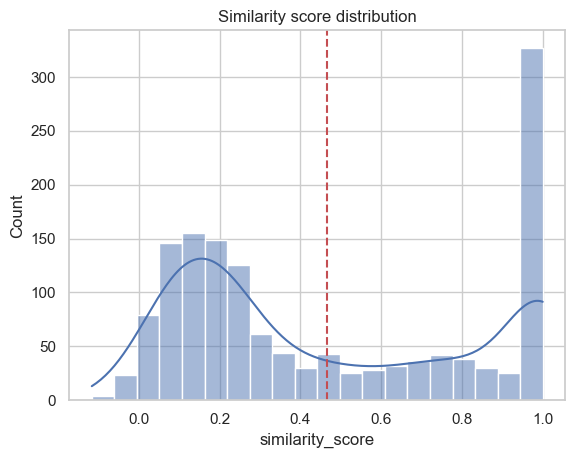

In [25]:
# Make a histogram plot with a density of similarity scores
ax = sns.histplot(data=data, x="similarity_score", bins=20, kde=True)
# Mark the mean
ax.axvline(data['similarity_score'].mean(), color='r', linestyle='--')
# Show the plot
plt.title('Similarity score distribution')
plt.show()

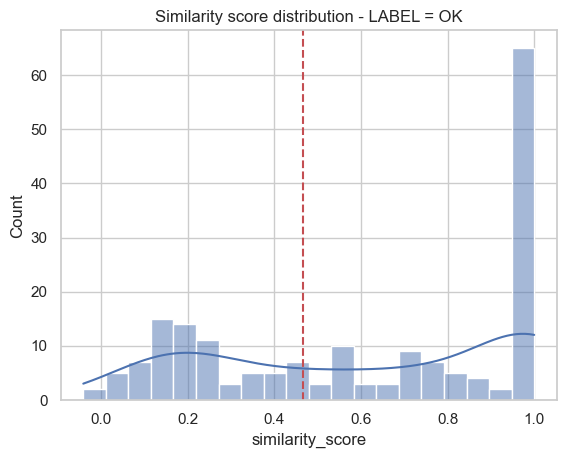

In [26]:
# Plot only the ones with LABEL not nan
ax = sns.histplot(data=data[data['LABEL'].notna()], x="similarity_score", bins=20, kde=True)
# Mark the mean
ax.axvline(data['similarity_score'].mean(), color='r', linestyle='--')
# Show the plot
plt.title('Similarity score distribution - LABEL = OK')
plt.show()